In [5]:
%pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.1/601.1 kB 250.4 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from IPython.display import Markdown, display
from pmdarima.arima import auto_arima

/var/folders/ff/xy6js6tn33v5x_0t8pkqk4y40000gn/T/ipykernel_1438/1093530435.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
#grouping by frequency 
def FrameChanging(df, x):
    t = df.groupby(pd.Grouper(freq=x)).agg({"open": "first", 
                                             "close": "last", 
                                             "low": "min", 
                                             "high": "max",
                                             "volume": "sum"})
    return t

this function calculates the mean absolute percentage error(MAPE) ,a MAPE lower than 20% is considered good for time series forecasting. This would indicate that on average the forecasts over the whole time period were less than 20% away from the actual values.

In [4]:
def smape_kun(y_true, y_pred):
    return np.mean(  (np.abs(y_pred - y_true) *200/(np.abs(y_pred) + np.abs(y_true))   ))

In [5]:
columns = ["Name", "ROR_MSE", "ROR_SMAPE","ROR_MAPE","ROR_MAE", "R_MSE", "R_SMAPE","R_MAPE","R_MAE", "C_MSE", "C_SMAPE", "C_MAPE", "C_MAE"]

In [6]:
def printmd(string):
    display(Markdown(string))
printmd('**bold**')

**bold**

p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.

d: The degree of differencing.

q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.


P: The order of the seasonal component for the auto-regressive (AR) model.

D: The integration order of the seasonal process.

Q: The order of the seasonal component of the moving average (MA) model.

In [19]:
def PerTimeData(df, Final, time, Name):


    
    df = df.dropna()
    
    #add columns lag, rateofreturn and return 
    df['lag'] = df['close'].shift(1)
    df['RateofReturn'] = (df['close']/df['lag'])  -1
    df['Return'] = (df['close']-df['lag'])
    
    df = df.dropna()
    
    st = min( int(len(df)*0.2), 50)
    st1 = (len(df)) - st
    train_data, test_data = df[0:st1], df[st1:]
    d_index = test_data.index
    print("Rate of Return Analysis")
    train_ar = train_data[['RateofReturn']]
    test_ar = test_data[['RateofReturn']]
    
    
    model_autoARIMA = auto_arima(train_ar['RateofReturn'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['RateofReturn'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
    
    mape0 = np.mean(np.abs(fc - test_data['RateofReturn'].values)/np.abs(test_data['RateofReturn'].values))
    print('MAPE: '+str(mape0))
    
    error0 = mean_squared_error(test_data['RateofReturn'].values, fc)
    print('Testing Mean Squared Error: %.3f' % error0)
    error1 = mean_absolute_error(test_data['RateofReturn'].values, fc)
    print('Testing Mean Absolute Error: %.3f' % error1)
    error2 = smape_kun(test_data['RateofReturn'].values, fc)
    print('Symmetric mean absolute percentage error: %.3f' % error2)
    
    
    
    
    

    print("\n\n\n Return Analysis")

    train_ar = train_data[['Return']]
    test_ar = test_data[['Return']]
    
    
    model_autoARIMA = auto_arima(train_ar['Return'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['Return'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
    
    mape1 = np.mean(np.abs(fc - test_data['Return'].values)/np.abs(test_data['Return'].values))
    print('MAPE: '+str(mape1))
    
    error3 = mean_squared_error(test_data['Return'].values, fc)
    print('Testing Mean Squared Error: %.3f' % error3)
    error4 = mean_absolute_error(test_data['Return'].values, fc)
    print('Testing Mean Absolute Error: %.3f' % error4)
    error5 = smape_kun(test_data['Return'].values, fc)
    print('Symmetric mean absolute percentage error: %.3f' % error5)

    
    
    print("\n\n\n  Close Price analysis")

    train_ar = train_data[['close']]
    test_ar = test_data[['close']]
    
    
    model_autoARIMA = auto_arima(train_ar['close'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['close'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
    
    mape2 = np.mean(np.abs(fc - test_data['close'].values)/np.abs(test_data['close'].values))
    print('MAPE: '+str(mape2))
    
    error6 = mean_squared_error(test_data['close'].values, fc)
    print('Testing Mean Squared Error: %.3f' % error6)
    error7 = mean_absolute_error(test_data['close'].values, fc)
    print('Testing Mean Absolute Error: %.3f' % error7)
    error8 = smape_kun(test_data['close'].values, fc)
    print('Symmetric mean absolute percentage error: %.3f' % error8)
    
    
    plt.plot(d_index, fc, color='blue', linestyle='dashed',label='Predicted Price')
    plt.plot(d_index, test_data['close'].values, color='red', label='Actual Price')
    plt.title('Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.figure(figsize=(20,10))
    plt.show()

    

    columns = ["Name", "ROR_MSE", "ROR_SMAPE","ROR_MAPE","ROR_MAE", "R_MSE", "R_SMAPE","R_MAPE","R_MAE", "C_MSE", "C_SMAPE", "C_MAPE", "C_MAE"]
    
    dict1 = {"Name":Name, "ROR_MAPE":mape0,"ROR_MSE": error0, "ROR_SMAPE":error2,"ROR_MAE":error1 , "R_MSE" :error3,"R_MAPE": mape1, "R_SMAPE":error5,"R_MAE":error4, "C_MSE":error6 ,  
             "C_SMAPE":error8, "C_MAE":error7, "C_MAPE": mape2 }
    
    Final[time] = (Final[time]).append(dict1, ignore_index = True) 

    
    

In [39]:
def PerTimeData2(df):


    
    df = df.dropna()
    
    df['lag'] = df['close'].shift(1)
    df['RateofReturn'] = (df['close']/df['lag'])  -1
    df['Return'] = (df['close']-df['lag'])
    
    df = df.dropna()
    
    st = min( int(len(df)*0.2), 50)
    st1 = (len(df)) - st
    train_data, test_data = df[0:st1], df[st1:]
    d_index = test_data.index
    print("Rate of Return Analysis")
    train_ar = train_data[['RateofReturn']]
    test_ar = test_data[['RateofReturn']]
    
    
    model_autoARIMA = auto_arima(train_ar['RateofReturn'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['RateofReturn'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
    
#     mape0 = np.mean(np.abs(fc - test_data['RateofReturn'].values)/np.abs(test_data['RateofReturn'].values))
#     print('MAPE: '+str(mape0))
    
#     error0 = mean_squared_error(test_data['RateofReturn'].values, fc)
#     print('Testing Mean Squared Error: %.3f' % error0)
#     error1 = mean_absolute_error(test_data['RateofReturn'].values, fc)
#     print('Testing Mean Absolute Error: %.3f' % error1)
#     error2 = smape_kun(test_data['RateofReturn'].values, fc)
#     print('Symmetric mean absolute percentage error: %.3f' % error2)
    
    
    plt.plot(d_index, fc, color='blue', linestyle='dashed',label='Predicted Rate of Return')
    plt.plot(d_index, test_data['RateofReturn'].values, color='red', label='Actual Return')
    plt.title('Rate of Return Prediction')
    plt.xlabel('Date')
    plt.ylabel('Rate of Return')
    plt.legend()
    plt.figure(figsize=(20,10))
    plt.show()
    
    
    
    

    print("\n\n\n Return Analysis")

    train_ar = train_data[['Return']]
    test_ar = test_data[['Return']]
    
    
    model_autoARIMA = auto_arima(train_ar['Return'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['Return'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
    
#     mape1 = np.mean(np.abs(fc - test_data['Return'].values)/np.abs(test_data['Return'].values))
#     print('MAPE: '+str(mape1))
    
#     error3 = mean_squared_error(test_data['Return'].values, fc)
#     print('Testing Mean Squared Error: %.3f' % error3)
#     error4 = mean_absolute_error(test_data['Return'].values, fc)
#     print('Testing Mean Absolute Error: %.3f' % error4)
#     error5 = smape_kun(test_data['Return'].values, fc)
#     print('Symmetric mean absolute percentage error: %.3f' % error5)

    plt.plot(d_index, fc, color='blue', linestyle='dashed',label='Predicted Return')
    plt.plot(d_index, test_data['Return'].values, color='red', label='Actual Return')
    plt.title('Return Prediction')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.figure(figsize=(20,10))
    plt.show()

    
    
    print("\n\n\n  Close Price analysis")

    train_ar = train_data[['close']]
    test_ar = test_data[['close']]
    
    
    model_autoARIMA = auto_arima(train_ar['close'].values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    
    
    model = sm.tsa.arima.ARIMA(train_ar['close'].values, order = model_autoARIMA.order)  
    fitted = model.fit()  
    fc = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence

    
#     mape2 = np.mean(np.abs(fc - test_data['close'].values)/np.abs(test_data['close'].values))
#     print('MAPE: '+str(mape2))
    
#     error6 = mean_squared_error(test_data['close'].values, fc)
#     print('Testing Mean Squared Error: %.3f' % error6)
#     error7 = mean_absolute_error(test_data['close'].values, fc)
#     print('Testing Mean Absolute Error: %.3f' % error7)
#     error8 = smape_kun(test_data['close'].values, fc)
#     print('Symmetric mean absolute percentage error: %.3f' % error8)
    
    
    plt.plot(d_index, fc, color='blue', linestyle='dashed',label='Predicted Price')
    plt.plot(d_index, test_data['close'].values, color='red', label='Actual Price')
    plt.title('Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.figure(figsize=(20,10))
    plt.show()

    


In [40]:
# grouping the dataset for the interval of one day 
df = pd.read_csv("../data/RELIANCE__EQ__NSE__NSE__MINUTE.csv")
df = df.dropna()

#converting timestamp to datetime format 
df['Date'] = pd.to_datetime(df['timestamp'])
df['DateIndex'] = pd.to_datetime(df['timestamp'])
df = df.set_index('DateIndex')
df = df.drop(['timestamp'], axis=1)

df_1D = FrameChanging(df, '1D')
df_1D['Date'] = df_1D.index

In [41]:
df_1D = df_1D.dropna()

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3995.462, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3998.489, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3997.424, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4006.911, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-4006.256, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4005.545, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3999.976, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4004.102, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4007.255, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3999.476, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-4006.412, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4005.025, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4000.291, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-4004.267, Time=0.27

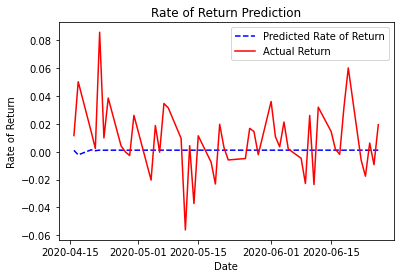

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7309.294, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7307.440, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7308.171, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7298.756, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7300.565, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7300.639, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7305.399, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7298.657, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=7298.794, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7284.701, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7302.109, Time=0.10 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=7284.394, Time=0.58 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=7287.855, Time=0.60 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=7288.642, Time=0.60 sec
 ARIMA(3,0,3)

/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


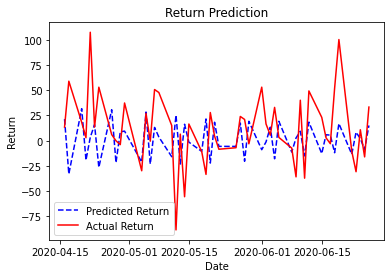

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7302.311, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7300.310, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7301.063, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7301.259, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7291.887, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7293.724, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7293.790, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7298.290, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7291.837, Time=0.51 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7291.881, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7277.835, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7295.221, Time=0.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7277.531, Time=1.07 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7281.163, Time=1.16 sec
 ARIMA(

/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


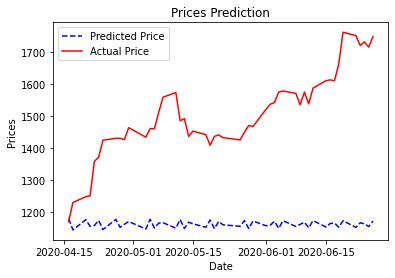

<Figure size 1440x720 with 0 Axes>

In [42]:
PerTimeData2(df_1D)

In [32]:
def Analyse(Name, Final):
    df = pd.read_csv(Name)
    
    df = df.dropna()
    
    df['Date'] = pd.to_datetime(df['timestamp'])
    df['DateIndex'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('DateIndex')
    df = df.drop(['timestamp'], axis=1)
    
    

    
#     df_5Min =  FrameChanging(df, '5Min')
#     df_5Min['Date'] = df_5Min.index
    
#     df_10Min = FrameChanging(df, '10Min')
#     df_10Min['Date'] = df_10Min.index
    
#     df_15Min = FrameChanging(df, '15Min')
#     df_15Min['Date'] = df_15Min.index
    
#     df_30Min = FrameChanging(df, '30Min')
#     df_30Min['Date'] = df_30Min.index
    
#     df_60Min = FrameChanging(df, '60Min')
#     df_60Min['Date'] = df_60Min.index
    
    df_1D = FrameChanging(df, '1D')
    df_1D['Date'] = df_1D.index
    
#     df_5D = FrameChanging(df, '5D')
#     df_5D['Date'] = df_5D.index
    
    df_1W = FrameChanging(df, '1W')
    df_1W['Date'] = df_1W.index
    
#     df_10D = FrameChanging(df, '10D')
#     df_10D['Date'] = df_10D.index
    
#     df_15D = FrameChanging(df, '15D')
#     df_15D['Date'] = df_15D.index
    
#     df_1M = FrameChanging(df, '1M')
#     df_1M['Date'] = df_1M.index
    
    
    
    

    
    
    
    
# #     printmd('**1 Minute Data Analysis**')
#     PerTimeData(df, df1, Final, "1_Min", Name, Name2)
    
# #     printmd('**5 Minute Data Analysis**')
#     PerTimeData(df_5Min, df1_5Min, Final, "5_Min",Name, Name2)
    
# #     printmd('**10 Minute Data Analysis**')
#     PerTimeData(df_10Min, df1_10Min, Final, "10_Min",Name, Name2)
    
# #     printmd('**15 Minute Data Analysis**')
#     PerTimeData(df_15Min, df1_15Min, Final, "15_Min",Name, Name2)
    
# #     printmd('**30 Minute Data Analysis**')
#     PerTimeData(df_30Min, df1_30Min, Final, "30_Min",Name, Name2)
    
# #     printmd('**1Hr Data Analysis**')
#     PerTimeData(df_60Min, df1_60Min, Final, "60_Min",Name, Name2)
    
    printmd('**1 Day Data Analysis**')
    PerTimeData(df_1D, Final, "1D",Name)
    
# #     printmd('**5 Day Data Analysis**')
#     PerTimeData(df_5D, df1_5D, Final, "5D",Name, Name2)
    
    printmd('**1 Week Data Analysis**')
    PerTimeData(df_1W, Final, "1W",Name)
    
# #     printmd('**10 Day Data Analysis**')
#     PerTimeData(df_10D, df1_10D, Final, "10D",Name, Name2)
    
# #     printmd('**15 Day Data Analysis**')
#     PerTimeData(df_15D, df1_15D, Final, "15D",Name, Name2)
    
# #     printmd('**1 Month Data Analysis**')
#     PerTimeData(df_1M, df1_1M, Final, "1M",Name, Name2)



In [33]:
def Analyse2(Name):
    df = pd.read_csv(Name)
    
    df = df.dropna()
    
    df['Date'] = pd.to_datetime(df['timestamp'])
    df['DateIndex'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('DateIndex')
    df = df.drop(['timestamp'], axis=1)
    
    

    
#     df_5Min =  FrameChanging(df, '5Min')
#     df_5Min['Date'] = df_5Min.index
    
#     df_10Min = FrameChanging(df, '10Min')
#     df_10Min['Date'] = df_10Min.index
    
#     df_15Min = FrameChanging(df, '15Min')
#     df_15Min['Date'] = df_15Min.index
    
#     df_30Min = FrameChanging(df, '30Min')
#     df_30Min['Date'] = df_30Min.index
    
#     df_60Min = FrameChanging(df, '60Min')
#     df_60Min['Date'] = df_60Min.index
    
    df_1D = FrameChanging(df, '1D')
    df_1D['Date'] = df_1D.index
    
#     df_5D = FrameChanging(df, '5D')
#     df_5D['Date'] = df_5D.index
    
    df_1W = FrameChanging(df, '1W')
    df_1W['Date'] = df_1W.index
    
#     df_10D = FrameChanging(df, '10D')
#     df_10D['Date'] = df_10D.index
    
#     df_15D = FrameChanging(df, '15D')
#     df_15D['Date'] = df_15D.index
    
#     df_1M = FrameChanging(df, '1M')
#     df_1M['Date'] = df_1M.index
    
    
    
    

    
    
    
    
# #     printmd('**1 Minute Data Analysis**')
#     PerTimeData(df, df1, Final, "1_Min", Name, Name2)
    
# #     printmd('**5 Minute Data Analysis**')
#     PerTimeData(df_5Min, df1_5Min, Final, "5_Min",Name, Name2)
    
# #     printmd('**10 Minute Data Analysis**')
#     PerTimeData(df_10Min, df1_10Min, Final, "10_Min",Name, Name2)
    
# #     printmd('**15 Minute Data Analysis**')
#     PerTimeData(df_15Min, df1_15Min, Final, "15_Min",Name, Name2)
    
# #     printmd('**30 Minute Data Analysis**')
#     PerTimeData(df_30Min, df1_30Min, Final, "30_Min",Name, Name2)
    
# #     printmd('**1Hr Data Analysis**')
#     PerTimeData(df_60Min, df1_60Min, Final, "60_Min",Name, Name2)
    
    printmd('**1 Day Data Analysis**')
    PerTimeData2(df_1D)
    
# #     printmd('**5 Day Data Analysis**')
#     PerTimeData(df_5D, df1_5D, Final, "5D",Name, Name2)
    
    printmd('**1 Week Data Analysis**')
    PerTimeData2(df_1W)
    
# #     printmd('**10 Day Data Analysis**')
#     PerTimeData(df_10D, df1_10D, Final, "10D",Name, Name2)
    
# #     printmd('**15 Day Data Analysis**')
#     PerTimeData(df_15D, df1_15D, Final, "15D",Name, Name2)
    
# #     printmd('**1 Month Data Analysis**')
#     PerTimeData(df_1M, df1_1M, Final, "1M",Name, Name2)



**1 Day Data Analysis**

/var/folders/ff/xy6js6tn33v5x_0t8pkqk4y40000gn/T/ipykernel_1438/3787496246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag'] = df['close'].shift(1)
/var/folders/ff/xy6js6tn33v5x_0t8pkqk4y40000gn/T/ipykernel_1438/3787496246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RateofReturn'] = (df['close']/df['lag'])  -1
/var/folders/ff/xy6js6tn33v5x_0t8pkqk4y40000gn/T/ipykernel_1438/3787496246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3995.462, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3998.489, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3997.424, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4006.911, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-4006.256, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4005.545, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3999.976, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4004.102, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4007.255, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3999.476, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-4006.412, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4005.025, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4000.291, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-4004.267, Time=0.30

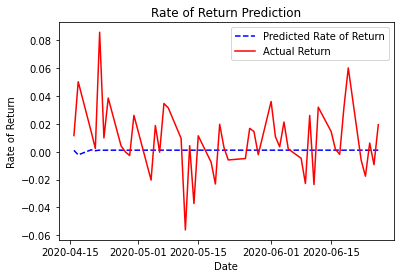

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7309.294, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7307.440, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7308.171, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7298.756, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7300.565, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7300.639, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7305.399, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7298.657, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=7298.794, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7284.701, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7302.109, Time=0.09 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=7284.394, Time=0.48 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=7287.855, Time=0.57 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=7288.642, Time=0.54 sec
 ARIMA(3,0,3)

/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


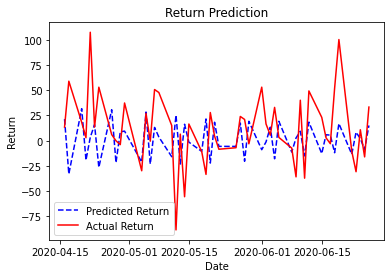

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7302.311, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7300.310, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7301.063, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7301.259, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7291.887, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7293.724, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7293.790, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7298.290, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7291.837, Time=0.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7291.881, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7277.835, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7295.221, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7277.531, Time=1.00 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7281.163, Time=1.04 sec
 ARIMA(

/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/varshar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


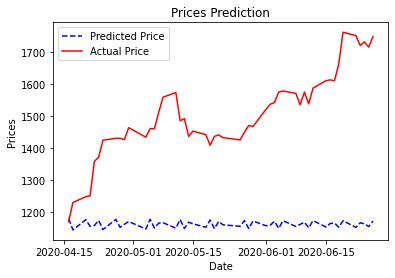

<Figure size 1440x720 with 0 Axes>

**1 Week Data Analysis**

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-526.027, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-524.608, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-524.595, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-522.611, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-529.374, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-528.866, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-528.964, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-527.190, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.258 seconds


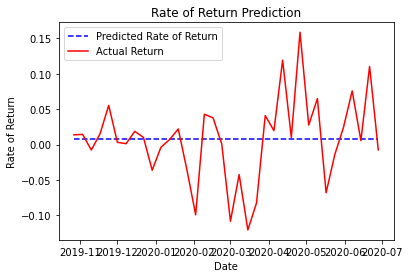

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1489.115, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1489.296, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1489.231, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1491.222, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1487.880, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1487.217, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1488.803, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1488.670, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1486.951, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1488.719, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.406 seconds


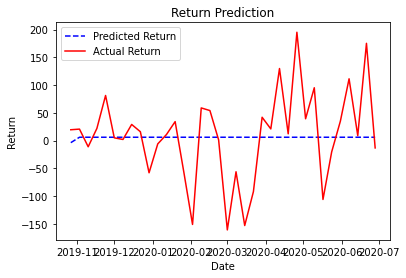

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1478.641, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1477.987, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1477.718, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1479.817, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1479.440, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1479.488, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1479.970, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.415 seconds


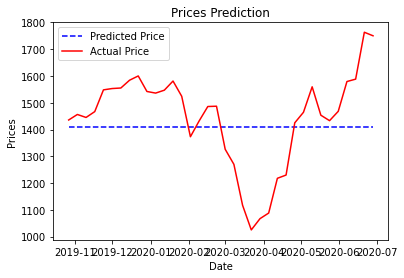

<Figure size 1440x720 with 0 Axes>

In [34]:
Analyse2("../Data/RELIANCE__EQ__NSE__NSE__MINUTE.csv")

**1 Day Data Analysis**

C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4913.974, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4920.083, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4918.677, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4925.900, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-4925.102, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4925.199, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4921.152, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-4923.015, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4924.090, Time=0.17 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.698 seconds


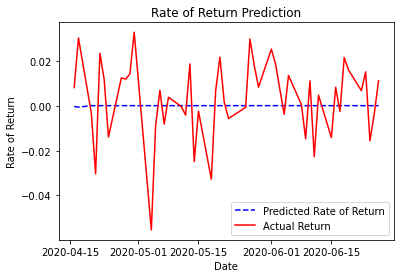

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9973.780, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9972.210, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9972.908, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9962.665, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9964.283, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9963.606, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9970.494, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9954.482, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9950.418, Time=0.33 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9965.942, Time=0.03 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=9929.166, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9943.111, Time=0.05 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=9900.192, Time=0.49 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=9957.182, Time=0.45 sec
 ARIMA(5,0,3)

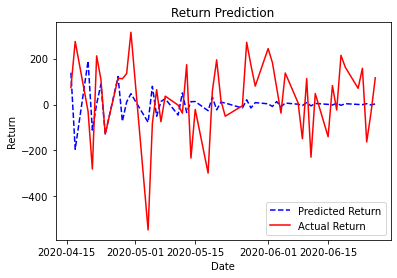

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9964.392, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9962.829, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9963.528, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9962.446, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9961.094, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9954.143, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9953.190, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9954.818, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9945.042, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9940.938, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9956.468, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9919.720, Time=0.53 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9933.525, Time=0.09 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=9891.104, Time=0.96 sec
 ARIMA(

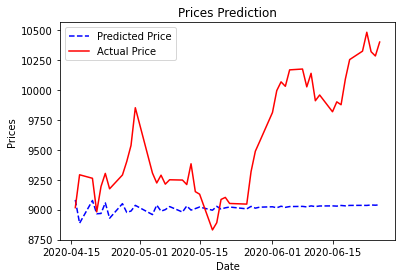

<Figure size 1440x720 with 0 Axes>

**1 Week Data Analysis**

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-777.219, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-775.266, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-775.260, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-773.263, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-778.663, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-776.889, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-776.872, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-774.880, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.269 seconds


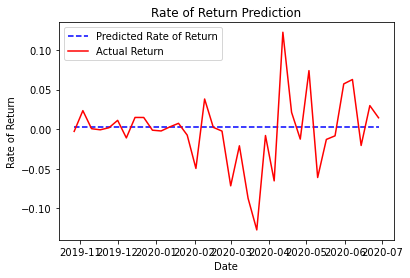

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1910.580, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1912.576, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1912.576, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1914.560, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1909.919, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1911.857, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1911.857, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1913.887, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.146 seconds


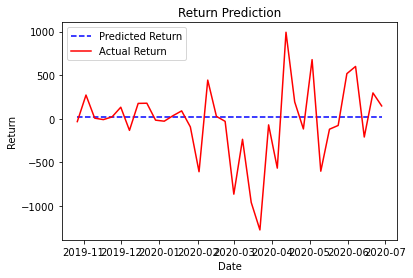

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1897.240, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1899.163, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1899.181, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1897.683, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1901.200, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.080 seconds


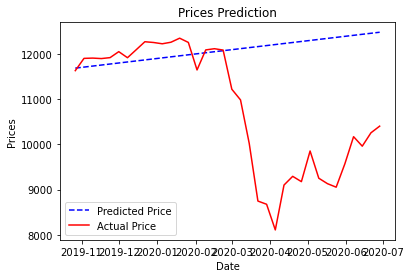

<Figure size 1440x720 with 0 Axes>

In [48]:
Analyse2("../Data/NIFTY_50__EQ__INDICES__NSE__MINUTE.csv")

In [ ]:
# Final = {}
# Final["1_Min"] = pd.DataFrame(columns=columns)
# Final["5_Min"] = pd.DataFrame(columns=columns)
# Final["10_Min"] = pd.DataFrame(columns=columns)
# Final["15_Min"] = pd.DataFrame(columns=columns)
# Final["30_Min"] = pd.DataFrame(columns=columns)
# Final["60_Min"] = pd.DataFrame(columns=columns)
# Final["1D"] = pd.DataFrame(columns=columns)
# Final["5D"] = pd.DataFrame(columns=columns)
# Final["1W"] = pd.DataFrame(columns=columns)
# Final["10D"] = pd.DataFrame(columns=columns)
# Final["15D"] = pd.DataFrame(columns=columns)
# Final["1M"] = pd.DataFrame(columns=columns)

In [ ]:
# import glob
# l =(glob.glob("../Data/*.csv"))
# print(l[1])
# Num = len(l)

In [ ]:
# for i in range(0,Num):
#     print(i)
#     try:
#         Analyse(l[i], Final)
#     except:
#         print(i , " failed")

# Final["1_Min"].to_csv('file1Min.csv')
# Final["5_Min"].to_csv('file5Min.csv')
# Final["10_Min"].to_csv('file10Min.csv')
# Final["15_Min"].to_csv('file15Min.csv')
# Final["30_Min"].to_csv('file30Min.csv')
# Final["60_Min"].to_csv('file60Min.csv')
# Final["1D"].to_csv('file11D.csv')
# Final["5D"].to_csv('file5D.csv')
# Final["1W"].to_csv('file11W.csv')
# Final["10D"].to_csv('file10D.csv')
# Final["15D"].to_csv('file15D.csv')
# Final["1M"].to_csv('file1M.csv')

**1 Day Data Analysis**

C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jd\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10147.594, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10146.739, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10146.681, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10143.021, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10147.996, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10147.279, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10147.219, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-10143.479, Time=0.35 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.165 seconds


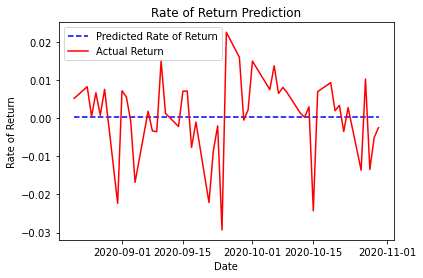

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19751.956, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19753.328, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19753.387, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19754.658, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19752.447, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.214 seconds


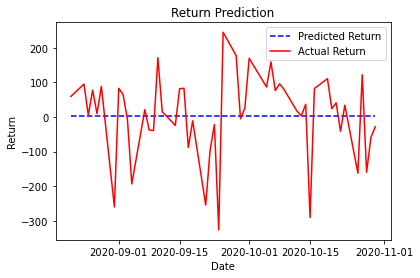

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19740.695, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19741.995, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19742.062, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19740.254, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19743.322, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.662 seconds


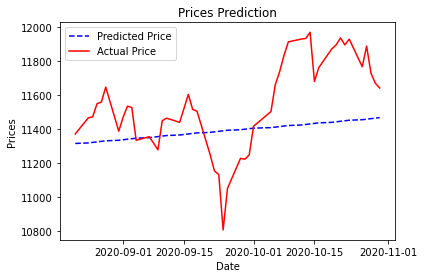

<Figure size 1440x720 with 0 Axes>

**1 Week Data Analysis**

Rate of Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1558.093, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1556.104, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1556.104, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1554.093, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1560.662, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1558.688, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1558.688, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1556.709, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.359 seconds


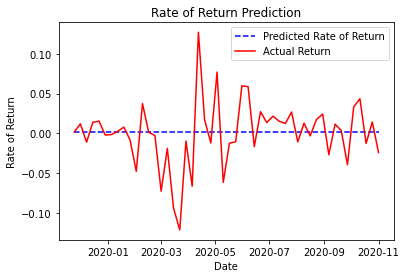

<Figure size 1440x720 with 0 Axes>




 Return Analysis
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4006.857, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4008.786, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4008.796, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4010.789, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4005.100, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4007.099, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4007.106, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4009.105, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.161 seconds


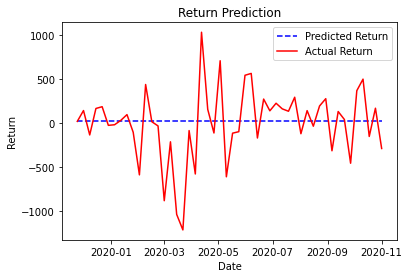

<Figure size 1440x720 with 0 Axes>




  Close Price analysis
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3992.902, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3994.896, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3994.905, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3994.712, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3996.902, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.127 seconds


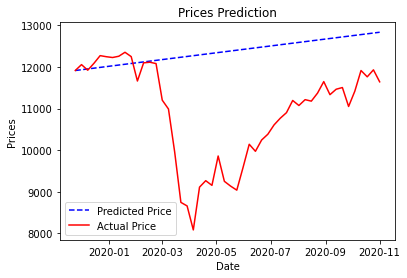

<Figure size 1440x720 with 0 Axes>

In [28]:
Analyse2("../nifty.csv")